# Project 7 - Applied Analytics
**Name:** Kayla Breum

**Date:** 2/19/2024

The purpose of this project is to demonstrate an introductory exploration of machine learning, utilizing skills with Jupyter, pandas, Seaborn, and other popular tools for data analytics.

## Time Series and Linear Regression

### Part 1 - Chart a Straight Line

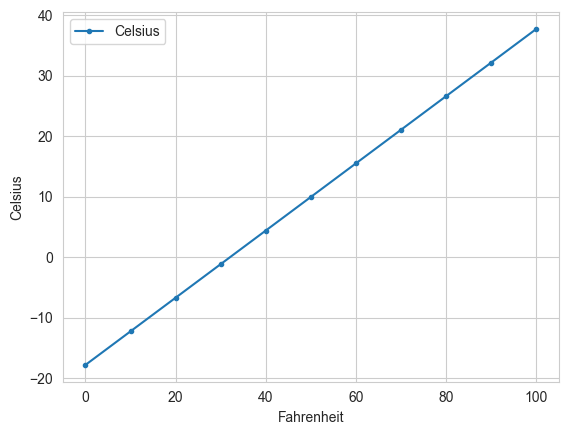

In [25]:
c = lambda f: 5/9* (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


### Part 2 - Loading the Average High Temperatures into the DataFrame

In [6]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [7]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


#### Cleaning the Data

In [9]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [10]:
nyc.Date.dtype

dtype('int64')

In [11]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Part 3 - Calculating Descriptive Statistics

In [26]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Part 4 - Forcasting Future January Average High Temperatures

In [17]:
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)
linear_regression.slope

0.014771361132966163

In [18]:
linear_regression.intercept

8.694993233674289

In [19]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [20]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

### Part 5 - Plotting the Average High Temperatures and a Regression Line

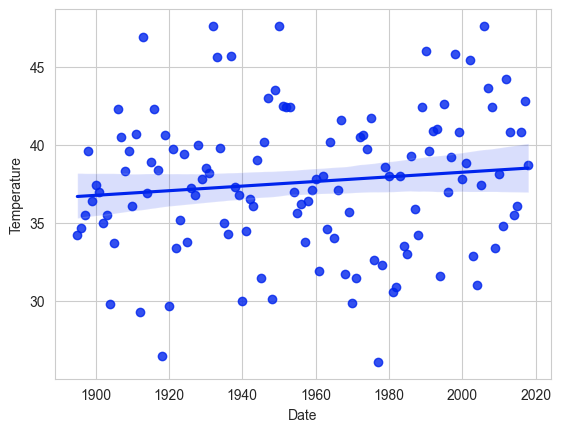

In [39]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

In [23]:
axes.set_ylim(10, 70)

(10.0, 70.0)